In [1]:
# pytraj works just on Ubuntu and OS

# !pip install pytraj

In [2]:
import pytraj as pt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_protein_data(protein_name):
    protein = pt.io.load_pdb_rcsb(protein_name)
    indices = [idx for idx, res in enumerate(protein.top.residues)]
    dataset = pt.multidihedral(protein, 'phi psi', resrange=indices)
    phi = np.array([d.values for d in dataset if 'phi' in d.key]).flatten()
    psi = np.array([d.values for d in dataset if 'psi' in d.key]).flatten()
    return phi, psi

In [4]:
def plot_ramachandran(phi, psi, name):
    colors = np.random.rand(len(psi))
    plt.figure()
    plt.xlim([-180, 180])
    plt.ylim([-180, 180])
    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.grid()
    plt.title(name)
    plt.scatter(phi, psi, alpha=0.5, c=colors)

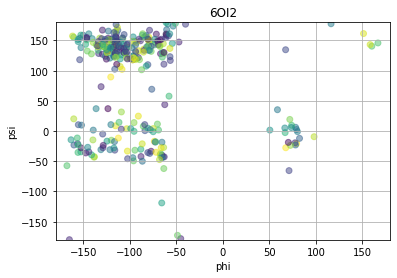

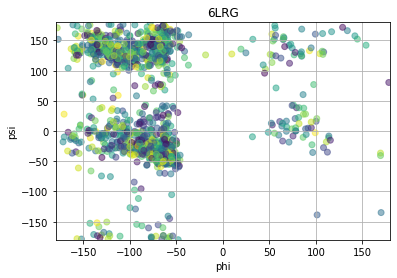

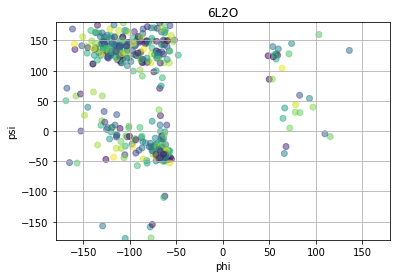

In [5]:
protein_names = ['6OI2', '6LRG', '6L2O']
for name in protein_names:
    phi, psi = load_protein_data(name)
    plot_ramachandran(phi, psi, name)